<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Discovery/blob/main/classificationModelling_graphConvAndGroover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Graph Convolution and WEAVE Based Classification Modelling

## Introduction
Fingerprint/descriptor representations of molecules serve as the foundation for machine learning approaches in chemoinformatics. However, a molecule's natural structure can be viewed as an undirected graph, where atoms are nodes and chemical bonds are edges. Given the inherent representation bias in fingerprint/descriptor methods—where certain aspects are highlighted at the expense of others—a machine learning model that utilizes graph-based representations would be more suited. This approach aligns closely with the intrinsic graph structure of molecules, potentially offering a more comprehensive and balanced analysis(Kearnes et al., 2016; Reiser et al., 2022).

The Graph Convolutional Model, engineered for comprehensive end-to-end learning, efficiently processes graphs of arbitrary dimensions, utilizing circular fingerprint molecular features to enhance both interpretability and predictive accuracy (Duvenaud et al., 2015). In parallel, the Weave model represents an evolutionary step in molecular graph convolution, introducing atom pair-based feature extraction that extends to non-adjacent atoms, though it encounters challenges related to the quantification of association distances and spatial coordinates (Duvenaud et al., 2015; Ohue et al., 2019).


#Graph Convolutional Modeling

## Data loading and Preprocessing



In [1]:
# For Reporducibility
import numpy as np
np.random.seed(42)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install --pre deepchem
import deepchem
deepchem.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 25.0 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.8.1.dev'

In [4]:
import deepchem as dc
import numpy as np

##Primary Dataset

In [8]:
# Load dataset
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/StandarizationOfDataset/StandarizedSmiles_cutOFF800daltonMolecularweight (1).xlsx')
df.head(5)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [9]:
df

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,-6.948340,22.359066,449.463,1,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)n1c(O)ccc1O)...
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,-2.058204,-20.779112,386.211,1,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,12.677232,-4.265130,330.225,1,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,12.681081,-4.258606,346.224,1,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1


In [10]:
# Count the frequency of each label
label_counts = df['classLabel'].value_counts()
# Print the frequency of labels
print(label_counts)

classLabel
0    2330
1    1747
Name: count, dtype: int64


## Graph Conv Featurization

In [35]:
import deepchem as dc
import pandas as pd
from rdkit import Chem
from deepchem.feat import ConvMolFeaturizer

# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df['classLabel'].tolist()

# Create a DeepChem dataset from the features and targets
dataset = dc.data.NumpyDataset(features, targets)

# Split the dataset into training, validation, and test sets
splitter = dc.splits.RandomSplitter()
import deepchem as dc
splitter = dc.splits.RandomSplitter()
train_frac = 0.7  # 70% of the data for training
valid_frac = 0.15  # 15% of the data for validation
test_frac = 0.15  # 15% of the data for testing

# Use the splitter to split the dataset
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset, frac_train=train_frac, frac_valid=valid_frac, frac_test=test_frac
)

## Graph Convolutional Network Modeling with Hyperparameter Optimization

In [12]:
import deepchem as dc
import joblib
from deepchem.models import GraphConvModel

# Define a function to create and train the GraphConvModel
def create_and_train_graph_conv_model(train_dataset, n_tasks, batch_size, dropout, nb_epoch):
    model = GraphConvModel(n_tasks, batch_size=batch_size, dropout=dropout, mode='classification')
    model.fit(train_dataset, nb_epoch=nb_epoch)
    return model

# Define your hyperparameter search space
params = {
    'batch_size': [64, 128, 256],
    'dropout': [0.01, 0.1, 0.2],
    'nb_epoch': [10, 30, 60, 120]
}

# Define the evaluation metric you want to use (e.g., ROC-AUC, accuracy, etc.)
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

# Define your model_builder function
def model_builder(**model_params):
    batch_size = model_params['batch_size']
    dropout = model_params['dropout']
    nb_epoch = model_params['nb_epoch']

    return create_and_train_graph_conv_model(train_dataset, n_tasks=1, batch_size=batch_size, dropout=dropout, nb_epoch=nb_epoch)

# Create an optimizer and perform hyperparameter search
optimizer = dc.hyper.GridHyperparamOpt(model_builder)
best_model, best_hyperparams, all_results = optimizer.hyperparam_search(params, train_dataset, test_dataset, metric)

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparams)


Best Hyperparameters: {'batch_size': 256, 'dropout': 0.01, 'nb_epoch': 120}


In [13]:
best_hyperparams

{'batch_size': 256, 'dropout': 0.01, 'nb_epoch': 120}

In [14]:
all_results

{'_batch_size_64_dropout_0.010000_nb_epoch_10': 0.8738095238095238,
 '_batch_size_64_dropout_0.010000_nb_epoch_30': 0.8888227513227513,
 '_batch_size_64_dropout_0.010000_nb_epoch_60': 0.8908509700176368,
 '_batch_size_64_dropout_0.010000_nb_epoch_120': 0.9051614858906525,
 '_batch_size_64_dropout_0.100000_nb_epoch_10': 0.8784832451499117,
 '_batch_size_64_dropout_0.100000_nb_epoch_30': 0.8861772486772488,
 '_batch_size_64_dropout_0.100000_nb_epoch_60': 0.8960317460317461,
 '_batch_size_64_dropout_0.100000_nb_epoch_120': 0.9013007054673721,
 '_batch_size_64_dropout_0.200000_nb_epoch_10': 0.8659942680776014,
 '_batch_size_64_dropout_0.200000_nb_epoch_30': 0.8869047619047619,
 '_batch_size_64_dropout_0.200000_nb_epoch_60': 0.8885361552028219,
 '_batch_size_64_dropout_0.200000_nb_epoch_120': 0.8894069664902997,
 '_batch_size_128_dropout_0.010000_nb_epoch_10': 0.8796626984126984,
 '_batch_size_128_dropout_0.010000_nb_epoch_30': 0.9030202821869489,
 '_batch_size_128_dropout_0.010000_nb_epoch

## Modeling with best Parameters

In [33]:
import tensorflow as tf

tf.keras.backend.clear_session()

import torch

torch.cuda.empty_cache()

In [36]:
from deepchem.models import GraphConvModel
import joblib
n_tasks = 1
modela = GraphConvModel(n_tasks, batch_size=256, dropout=0.01, mode='classification', model_dir="/content/drive/MyDrive/Predictive Generative transfer learning/TransferAll/Graph Convolutional")
modela.fit(train_dataset, nb_epoch=120)

0.042190513014793395

## Cross species evaluation

### Upload and prep for species datasets
Species datasets: eel (CHEMBL4078), cow (CHEMBL4768), mouse (CHEMBL3199), ray (CHEMBL4780), mosquito (CHEMBL2046266), mouse (CHEMBL3198), and independent  human dataset containing molecules not present on  ChEMBL22  were obtained from Vignaux et al(2023) for validation and specificity inferences.

In [37]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_humanIndependent.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_eel.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mouse.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_cow.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_ray.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mosquito.xlsx')

### Featurization of smiles on species datasets - Grah Conv

### human

In [41]:
df_humanIndependent.to_csv('inhibitor_HumanIndependent.csv', index=False)
df_eel.to_csv('inhibitor_eel.csv', index=False)
df_mouse.to_csv('inhibitor_mouse.csv', index=False)
df_cow.to_csv('inhibitor_cow.csv', index=False)
df_ray.to_csv('inhibitor_ray.csv', index=False)
df_mosquito.to_csv('inhibitor_mosquito.csv', index=False)

In [42]:

# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_humanIndependent['cleanedMol'].tolist())
# Extract the target values from the DataFrame
targets = df_humanIndependent['binary_activities'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_humanIndependent= dc.data.NumpyDataset(features, targets)

### eel

In [43]:
# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_eel['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_eel['single-class-label'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_eel= dc.data.NumpyDataset(features, targets)

### cow

In [44]:

# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_cow['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_cow['single-class-label'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_cow= dc.data.NumpyDataset(features, targets)







### mosquito

In [45]:
# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_mosquito['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_mosquito['single-class-label'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_mosquito= dc.data.NumpyDataset(features, targets)

### ray

In [46]:
# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_ray['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_ray['single-class-label'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_ray= dc.data.NumpyDataset(features, targets)

###mouse

In [47]:
# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_mouse['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_mouse['single-class-label'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_mouse= dc.data.NumpyDataset(features, targets)

# Cross species evaluation -- graph conv

Confusion Matrix for Human Test dataset:
[[338  20]
 [ 30 224]]
Confusion Matrix for Human Independent dataset:
[[114  24]
 [ 29  41]]
Confusion Matrix for Eel dataset:
[[2792  583]
 [ 982 1102]]
Confusion Matrix for Mouse dataset:
[[193  30]
 [ 39 106]]
Confusion Matrix for Cow dataset:
[[164  54]
 [ 42 197]]
Confusion Matrix for Ray dataset:
[[516 203]
 [303 384]]
Confusion Matrix for Mosquito dataset:
[[39  6]
 [12 15]]


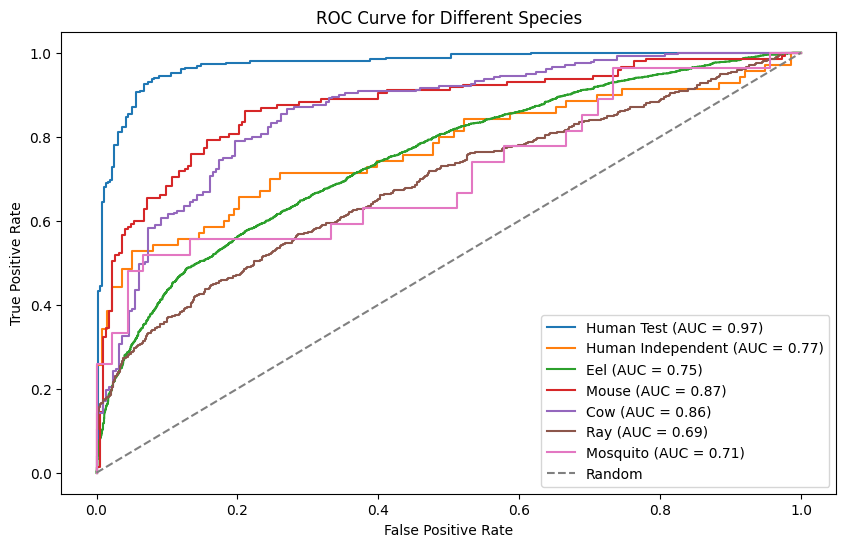

Evaluation for Human Test dataset:
Accuracy: 0.9183
Precision: 0.9180
Recall: 0.8819
F1 Score: 0.8996
MCC: 0.8313
Cohen's Kappa: 0.8308


Evaluation for Human Independent dataset:
Accuracy: 0.7452
Precision: 0.6308
Recall: 0.5857
F1 Score: 0.6074
MCC: 0.4198
Cohen's Kappa: 0.4192


Evaluation for Eel dataset:
Accuracy: 0.7133
Precision: 0.6540
Recall: 0.5288
F1 Score: 0.5848
MCC: 0.3745
Cohen's Kappa: 0.3696


Evaluation for Mouse dataset:
Accuracy: 0.8125
Precision: 0.7794
Recall: 0.7310
F1 Score: 0.7544
MCC: 0.6039
Cohen's Kappa: 0.6031


Evaluation for Cow dataset:
Accuracy: 0.7899
Precision: 0.7849
Recall: 0.8243
F1 Score: 0.8041
MCC: 0.5788
Cohen's Kappa: 0.5780


Evaluation for Ray dataset:
Accuracy: 0.6401
Precision: 0.6542
Recall: 0.5590
F1 Score: 0.6028
MCC: 0.2804
Cohen's Kappa: 0.2775


Evaluation for Mosquito dataset:
Accuracy: 0.7500
Precision: 0.7143
Recall: 0.5556
F1 Score: 0.6250
MCC: 0.4497
Cohen's Kappa: 0.4419




In [48]:
import deepchem as dc
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_humanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Evaluate and plot ROC curve for each dataset
for species, data in datasets.items():
    X = data.X
    y_true = data.y.ravel()
    # Make predictions on the test dataset
    y_pred = best_model.predict(data).reshape(-1, 2)
    y_pred_positive = y_pred[:, 1]

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_positive)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Calculate the confusion matrix
    y_pred_binary = np.argmax(y_pred, axis=1)
    conf_matrix = confusion_matrix(y_true, y_pred_binary)

    # Calculate other evaluation metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    mcc = matthews_corrcoef(y_true, y_pred_binary)
    cohen_kappa = cohen_kappa_score(y_true, y_pred_binary)

    # Store the evaluation metrics in the dictionary
    evaluation_metrics[species] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        "Cohen's Kappa": cohen_kappa
    }

    # Plot the ROC curve for each species
    plt.plot(fpr, tpr, label=f'{species} (AUC = {roc_auc:.2f})')

    # Display Confusion Matrix
    print(f"Confusion Matrix for {species} dataset:")
    print(conf_matrix)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Different Species')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Create a DataFrame from the evaluation_metrics dictionary
df_metrics = pd.DataFrame(evaluation_metrics).transpose()

# Save the DataFrames to Excel files
df_metrics.to_excel('evaluation_metrics_graphConv.xlsx', index_label='Species')


###Cross Species evaluation

Confusion Matrix for Human Test dataset:
[[338  20]
 [ 30 224]]
Confusion Matrix for Human Independent dataset:
[[114  24]
 [ 29  41]]


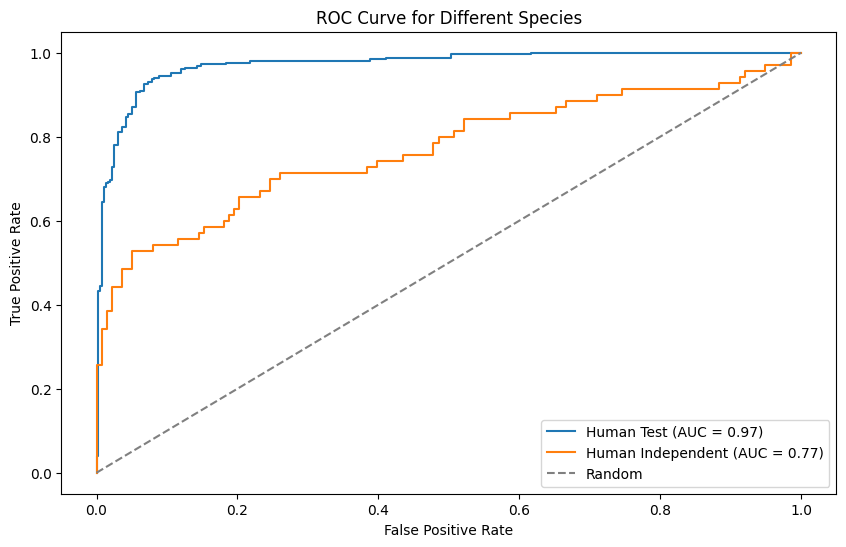

Evaluation for Human Test dataset:
Accuracy: 0.9183
Precision: 0.9180
Recall: 0.8819
F1 Score: 0.8996
MCC: 0.8313
Cohen's Kappa: 0.8308


Evaluation for Human Independent dataset:
Accuracy: 0.7452
Precision: 0.6308
Recall: 0.5857
F1 Score: 0.6074
MCC: 0.4198
Cohen's Kappa: 0.4192




In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_humanIndependent
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Evaluate and plot ROC curve for each dataset
for species, data in datasets.items():
    X = data.X
    y_true = data.y.ravel()

    # Make predictions on the test dataset
    y_pred = best_model.predict(data).reshape(-1, 2)
    y_pred_positive = y_pred[:, 1]

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_positive)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Calculate the confusion matrix
    y_pred_binary = np.argmax(y_pred, axis=1)
    conf_matrix = confusion_matrix(y_true, y_pred_binary)

    # Calculate other evaluation metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    mcc = matthews_corrcoef(y_true, y_pred_binary)
    cohen_kappa = cohen_kappa_score(y_true, y_pred_binary)

    # Store the evaluation metrics in the dictionary
    evaluation_metrics[species] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        "Cohen's Kappa": cohen_kappa
    }

    # Plot the ROC curve for each species
    plt.plot(fpr, tpr, label=f'{species} (AUC = {roc_auc:.2f})')

    # Display Confusion Matrix
    print(f"Confusion Matrix for {species} dataset:")
    print(conf_matrix)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Different Species')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Create a DataFrame from the evaluation_metrics dictionary
df_metrics = pd.DataFrame(evaluation_metrics).transpose()

# Save the DataFrames to Excel files
df_metrics.to_excel('evaluation_metrics_graphConv.xlsx', index_label='Species')

# Create a DataFrame from the evaluation_metrics dictionary
df_metrics = pd.DataFrame(evaluation_metrics).transpose()

# Save the DataFrames to Excel files
df_metrics.to_excel('evaluation_metrics_tpot.xlsx', index_label='Species')


#Weave Model
Weave model represents an evolutionary step in molecular graph convolution, introducing atom pair-based feature extraction that extends to non-adjacent atoms, though it encounters challenges related to the quantification of association distances and spatial coordinates (Duvenaud et al., 2015; Ohue et al., 2019


## Weave Modeling(hyperparameter optimization was not possible due to nature of data)

In [50]:
import deepchem as dc
import pandas as pd
from rdkit import Chem
from deepchem.feat import ConvMolFeaturizer

# Define the ConvMolFeaturizer
featurizer = dc.feat.WeaveFeaturizer()
# Featurize the SMILES column
features = featurizer.featurize(df['cleanedMol'].tolist())
# Extract the target values from the DataFrame
targets = df['classLabel'].tolist()
# Create a DeepChem dataset from the features and targets
dataset = dc.data.NumpyDataset(features, targets)
# Split the dataset into training, validation, and test sets
splitter = dc.splits.RandomSplitter()
import deepchem as dc
splitter = dc.splits.RandomSplitter()
train_frac = 0.7
valid_frac = 0.15
test_frac = 0.15
# Use the splitter to split the dataset
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset, frac_train=train_frac, frac_valid=valid_frac, frac_test=test_frac
)

In [51]:
model = dc.models.WeaveModel(n_tasks=1, n_weave=2, fully_connected_layer_sizes=[2000, 1000], mode="classification", model_dir="/content/drive/MyDrive/Predictive Generative transfer learning/TransferAll/Graph Convolutional")
loss = model.fit(train_dataset)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


### Featurization of smiles on species datasets - Weave

In [52]:
df_humanIndependent.to_csv('inhibitor_HumanIndependent.csv', index=False)
df_eel.to_csv('inhibitor_eel.csv', index=False)
df_mouse.to_csv('inhibitor_mouse.csv', index=False)
df_cow.to_csv('inhibitor_cow.csv', index=False)
df_ray.to_csv('inhibitor_ray.csv', index=False)
df_mosquito.to_csv('inhibitor_mosquito.csv', index=False)

### human

In [53]:
# Define the ConvMolFeaturizer
featurizer = dc.feat.WeaveFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_humanIndependent['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_humanIndependent['binary_activities'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_humanIndependent= dc.data.NumpyDataset(features, targets)

### eel

In [54]:

# Define the ConvMolFeaturizer
featurizer = dc.feat.WeaveFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_eel['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_eel['single-class-label'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_eel= dc.data.NumpyDataset(features, targets)

### cow

In [55]:
# Define the ConvMolFeaturizer
featurizer = dc.feat.WeaveFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_cow['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_cow['single-class-label'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_cow= dc.data.NumpyDataset(features, targets)

### mosquito

In [56]:
# Define the ConvMolFeaturizer
featurizer = dc.feat.WeaveFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_mosquito['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_mosquito['single-class-label'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_mosquito= dc.data.NumpyDataset(features, targets)

### ray

In [57]:
# Define the ConvMolFeaturizer
featurizer = dc.feat.WeaveFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_ray['cleanedMol'].tolist())

# Extract the target values from the DataFrame
targets = df_ray['single-class-label'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_ray= dc.data.NumpyDataset(features, targets)

### mouse

In [58]:
# Define the ConvMolFeaturizer
featurizer = dc.feat.WeaveFeaturizer()
# Featurize the SMILES column
features = featurizer.featurize(df_mouse['cleanedMol'].tolist())
# Extract the target values from the DataFrame
targets = df_mouse['single-class-label'].tolist()
# Create a DeepChem dataset from the features and targets
dataset_mouse= dc.data.NumpyDataset(features, targets)

### Cross species evaluation - weave

Confusion Matrix for Human Test dataset:
[[151 195]
 [ 32 234]]
Confusion Matrix for Human Independent dataset:
[[64 74]
 [10 60]]
Confusion Matrix for Eel dataset:
[[1191 2184]
 [ 428 1656]]
Confusion Matrix for Mouse dataset:
[[ 75 148]
 [ 20 125]]
Confusion Matrix for Cow dataset:
[[ 55 163]
 [  5 234]]
Confusion Matrix for Ray dataset:
[[199 520]
 [137 550]]
Confusion Matrix for Mosquito dataset:
[[ 3 42]
 [ 1 26]]


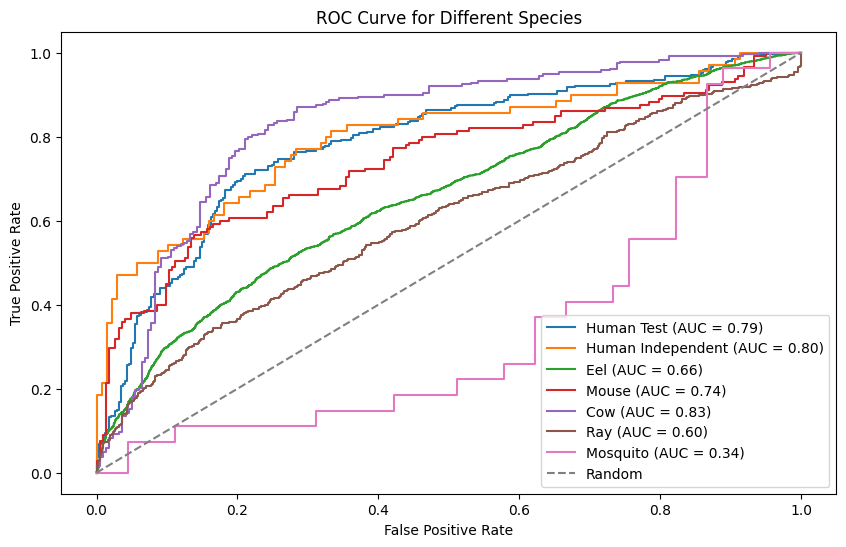

Evaluation for Human Test dataset:
Accuracy: 0.6291
Precision: 0.5455
Recall: 0.8797
F1 Score: 0.6734
MCC: 0.3423
Cohen's Kappa: 0.2952


Evaluation for Human Independent dataset:
Accuracy: 0.5962
Precision: 0.4478
Recall: 0.8571
F1 Score: 0.5882
MCC: 0.3167
Cohen's Kappa: 0.2619


Evaluation for Eel dataset:
Accuracy: 0.5215
Precision: 0.4313
Recall: 0.7946
F1 Score: 0.5591
MCC: 0.1569
Cohen's Kappa: 0.1270


Evaluation for Mouse dataset:
Accuracy: 0.5435
Precision: 0.4579
Recall: 0.8621
F1 Score: 0.5981
MCC: 0.2215
Cohen's Kappa: 0.1719


Evaluation for Cow dataset:
Accuracy: 0.6324
Precision: 0.5894
Recall: 0.9791
F1 Score: 0.7358
MCC: 0.3422
Cohen's Kappa: 0.2390


Evaluation for Ray dataset:
Accuracy: 0.5327
Precision: 0.5140
Recall: 0.8006
F1 Score: 0.6261
MCC: 0.0907
Cohen's Kappa: 0.0764


Evaluation for Mosquito dataset:
Accuracy: 0.4028
Precision: 0.3824
Recall: 0.9630
F1 Score: 0.5474
MCC: 0.0626
Cohen's Kappa: 0.0227




In [59]:
import deepchem as dc
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_humanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Evaluate and plot ROC curve for each dataset
for species, data in datasets.items():
    X = data.X
    y_true = data.y.ravel()

    # Make predictions on the test dataset
    y_pred = model.predict(data).reshape(-1, 2)
    y_pred_positive = y_pred[:, 1]

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_positive)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Calculate the confusion matrix
    y_pred_binary = np.argmax(y_pred, axis=1)
    conf_matrix = confusion_matrix(y_true, y_pred_binary)

    # Calculate other evaluation metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    mcc = matthews_corrcoef(y_true, y_pred_binary)
    cohen_kappa = cohen_kappa_score(y_true, y_pred_binary)

    # Store the evaluation metrics in the dictionary
    evaluation_metrics[species] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        "Cohen's Kappa": cohen_kappa
    }

    # Plot the ROC curve for each species
    plt.plot(fpr, tpr, label=f'{species} (AUC = {roc_auc:.2f})')

    # Display Confusion Matrix
    print(f"Confusion Matrix for {species} dataset:")
    print(conf_matrix)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Different Species')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Create a DataFrame from the evaluation_metrics dictionary
df_metrics = pd.DataFrame(evaluation_metrics).transpose()

# Save the DataFrames to Excel files
df_metrics.to_excel('evaluation_metrics_grover.xlsx', index_label='Species')


##References

* https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Introduction_to_Graph_Convolutions.ipynb
* Ramsundar, B., Eastman, P., Walters, P., Pande, V., Leswing, K., & Wu, Z. (2019). Deep Learning for the Life Sciences. O’Reilly Media. https://www.amazon.com/Deep-Learning-Life-Sciences-Microscopy/dp/1492039837
* Vignaux, P. A., Lane, T. R., Urbina, F., Gerlach, J., Puhl, A. C., Snyder, S. H., & Ekins, S. (2023). Validation of Acetylcholinesterase Inhibition Machine Learning Models for Multiple Species. Chemical Research in Toxicology, 36(2), 188–201. https://doi.org/10.1021/acs.chemrestox.2c00283
* Duvenaud, D., Maclaurin, D., Aguilera-Iparraguirre, J., Gómez-Bombarelli, R., Hirzel, T., Aspuru-Guzik, A., & Adams, R. P. (2015). Convolutional Networks on Graphs for Learning Molecular Fingerprints (arXiv:1509.09292). arXiv. http://arxiv.org/abs/1509.09292
* Durant, J. L., Leland, B. A., Henry, D. R., & Nourse, J. G. (2002). Reoptimization of MDL Keys for Use in Drug Discovery. Journal of Chemical Information and Computer Sciences, 42(6), 1273–1280. https://doi.org/10.1021/ci010132r